# PART 1 & PART 2

# Weather Data 


This part of the report refers to the analysis of the weather data. These data include the complete catalog of local climatological data from 2009 through 2015 for NYC.

## Libraries
In the cell bellow, the libraries that will be used for the manipulation of the data are imported.
* Pandas is a software library written for data manipulation and analysis. 
* Numpy is a software library that is used for scientific computing in python. 
* Sqlalchemy is an opensource SQL toolkit that is used in python.



In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

## Getting the path of the weather CSV files 

The primary step in data analysis is to read the data to enable their manipulation. In the cell bellow the data are imported to Jupiter notebook from the path that they are saved in the computer. 

Since, we are interested in importing multiple files at once, a directory is created using the function listdir (imported from the os library), that allows the import and the manipulation of multiple files at once.  

To be able to analyze the data we need to read the data. The data is in the weather folder with the individual CSV files labelled 2009 to 2015. We make a list of files paths and read the required collumns subsequently concatenating them into a single data frame. 

In [3]:
from os import listdir
path = "/Users/rishabhsalwan/Downloads/Project Data/weather"
directory = [path + "/" + filename for filename in listdir(path) if filename.endswith(".csv")]
directory

['/Users/rishabhsalwan/Downloads/Project Data/weather/2012_weather.csv',
 '/Users/rishabhsalwan/Downloads/Project Data/weather/2011_weather.csv',
 '/Users/rishabhsalwan/Downloads/Project Data/weather/2014_weather.csv',
 '/Users/rishabhsalwan/Downloads/Project Data/weather/2013_weather.csv',
 '/Users/rishabhsalwan/Downloads/Project Data/weather/2009_weather.csv',
 '/Users/rishabhsalwan/Downloads/Project Data/weather/2015_weather.csv',
 '/Users/rishabhsalwan/Downloads/Project Data/weather/2010_weather.csv']

## Importing the Weather files

The following cell illustrates the import of the weather files in the directory created above using a for loop to iterate through the directory. 

* The for loop allows for the weather data in a csv file to be appended to a dataframe. 

As it can be seen bellow, before the for loop, two empty dataframes, weather_hourly and weather_daily are created. Subsequently, as it can be seen in the for loop, the weather_hourly data are inserted in the empty database created. It's worth mentioning that using the command where we specify hourly_df, we filter the data, selecting only the columns that are worth analyzing for the scope of the project.

In [4]:
weather_hourly = pd.DataFrame()
weather_daily = pd.DataFrame()
for file in directory:
    df = pd.read_csv(file)
    
    hourly_df = df[["DATE","LATITUDE","LONGITUDE","HourlyPrecipitation","HourlyWindSpeed"]]
    weather_hourly = weather_hourly.append(hourly_df, ignore_index=True)
    weather_hourly = pd.concat([weather_hourly,hourly_df])
    
    daily_df = df[["DATE","DailyAverageWindSpeed"]]
    weather_daily = pd.concat([weather_daily,daily_df])

<ipython-input-4-3b37173fcc59>:4: DtypeWarning: Columns (7,8,9,10,17,18,42,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-3b37173fcc59>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_hourly = weather_hourly.append(hourly_df, ignore_index=True)
<ipython-input-4-3b37173fcc59>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-3b37173fcc59>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_hourly = weather_hourly.append(hourly_df, ignore_index=True)
<ipython-input-4-3b37173fcc59>:4: DtypeWarning: Columns (8,9,17,18,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4

## Manipulating the date

Now we format the date column for future data manipulation based on date. 

In [5]:
weather_hourly["DATE"] = pd.to_datetime(weather_hourly["DATE"],format='%Y-%m-%d %H:%M:%S')
weather_hourly

,DATE,LATITUDE,LONGITUDE,HourlyPrecipitation,HourlyWindSpeed
0,2012-01-01 00:51:00,40.77898,-73.96925,NaN,6.0
1,2012-01-01 01:51:00,40.77898,-73.96925,NaN,7.0
2,2012-01-01 02:51:00,40.77898,-73.96925,NaN,6.0
3,2012-01-01 03:51:00,40.77898,-73.96925,NaN,5.0
4,2012-01-01 04:51:00,40.77898,-73.96925,NaN,0.0
...,...,...,...,...,...
10460,2010-12-31 19:51:00,40.77898,-73.96925,NaN,5.0
10461,2010-12-31 20:51:00,40.77898,-73.96925,NaN,7.0
10462,2010-12-31 21:51:00,40.77898,-73.96925,NaN,7.0
10463,2010-12-31 22:51:00,40.77898,-73.96925,NaN,6.0


## Filtering the NaN data

In the cell bellow, the data in the weather_hourly database are filtered to remove any rows that don't contain any information (Nan) . This filtering of the data is performed with the .dropna() function

In [6]:
weather_hourly_final = weather_hourly.dropna()
weather_hourly_final = weather_hourly_final.reset_index()
weather_hourly_final

,index,DATE,LATITUDE,LONGITUDE,HourlyPrecipitation,HourlyWindSpeed
0,24,2012-01-01 18:51:00,40.77898,-73.96925,0.01,3.0
1,25,2012-01-01 19:51:00,40.77898,-73.96925,T,7.0
2,26,2012-01-01 20:51:00,40.77898,-73.96925,0.04,9.0
3,27,2012-01-01 21:51:00,40.77898,-73.96925,T,11.0
4,269,2012-01-11 21:51:00,40.77898,-73.96925,T,11.0
...,...,...,...,...,...,...
76515,10339,2010-12-27 05:22:00,40.77898,-73.96925,T,15.0
76516,10340,2010-12-27 05:51:00,40.77898,-73.96925,T,18.0
76517,10341,2010-12-27 06:12:00,40.77898,-73.96925,T,16.0
76518,10342,2010-12-27 06:20:00,40.77898,-73.96925,T,16.0


## Checking the data

The .info function bellow is used to ensure that all of the collumns in the database don't contain any null values

In [7]:
weather_hourly_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76520 entries, 0 to 76519
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                76520 non-null  int64         
 1   DATE                 76520 non-null  datetime64[ns]
 2   LATITUDE             76520 non-null  float64       
 3   LONGITUDE            76520 non-null  float64       
 4   HourlyPrecipitation  76520 non-null  object        
 5   HourlyWindSpeed      76520 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 3.5+ MB


## Replacing  Precipitation Trace 


As it was interpreted reading the data, in some rows HourlyPrecipitation contained the letter T (for Trace). Research was contacted and it was deduced that T usually translates to less than 0.01. To enable the data intepretation, and for convenience, the letter T was swapped with 0.01. 

In [8]:
weather_hourly_final['HourlyPrecipitation'] = weather_hourly_final ['HourlyPrecipitation'].str.replace('T',"0.01")
weather_hourly_final

,index,DATE,LATITUDE,LONGITUDE,HourlyPrecipitation,HourlyWindSpeed
0,24,2012-01-01 18:51:00,40.77898,-73.96925,0.01,3.0
1,25,2012-01-01 19:51:00,40.77898,-73.96925,0.01,7.0
2,26,2012-01-01 20:51:00,40.77898,-73.96925,0.04,9.0
3,27,2012-01-01 21:51:00,40.77898,-73.96925,0.01,11.0
4,269,2012-01-11 21:51:00,40.77898,-73.96925,0.01,11.0
...,...,...,...,...,...,...
76515,10339,2010-12-27 05:22:00,40.77898,-73.96925,0.01,15.0
76516,10340,2010-12-27 05:51:00,40.77898,-73.96925,0.01,18.0
76517,10341,2010-12-27 06:12:00,40.77898,-73.96925,0.01,16.0
76518,10342,2010-12-27 06:20:00,40.77898,-73.96925,0.01,16.0


## Converting Pandas dataframe to SQL Table 

Here, the processed panda dataframe for weather hourly is converted into a SQL Table and consequently saved as a table, weather_hourly to an SQL Database named project.db


In [ ]:
engine = create_engine('sqlite:////Users/rishabhsalwan/Downloads/Project Data/Project.db', echo=False)
weather_hourly_final.to_sql('Weather_hourly', con=engine)



## Following same procedure for Weather_daily data

The same procedures and functions that were followed and used for the weather_hourly data are followed for the weather_daily data to format the data and enable their manipulation

In [ ]:
weather_daily["DATE"] = pd.to_datetime(weather_daily["DATE"],format='%Y-%m-%d %H:%M:%S')
weather_daily_final = weather_daily.dropna()
weather_daily_final = weather_daily_final.reset_index()
weather_daily_final = weather_daily_final.drop(columns=["index"])

engine = create_engine('sqlite:////Users/rishabhsalwan/Downloads/Project Data/Project.db', echo=False)
weather_daily_final.to_sql('Weather_daily', con=engine)

# Uber Data 


This part of the report refers to the analysis of the uber data. These data include a sample of Uber rides from 01-2009 through 06-2015.

## Importing the Uber data

The following cell illustrates the import of the uber data in the Jupiter Notebook. 

In [9]:
uber_df = pd.read_csv("/Users/rishabhsalwan/Downloads/Project Data/uber_rides_sample.csv")

## Filtering for longitude and latitude 

The cell bellow allows the filtering of the data by removing from the dataset the data that are not within the pre-specified longitude and latitude coordinates

In [10]:
filter_df = uber_df[(uber_df["pickup_longitude"]< -73.717047)&(uber_df["pickup_longitude"]> -74.242330)&
        (uber_df["dropoff_longitude"]< -73.717047)&(uber_df["dropoff_longitude"]> -74.242330)&
       (uber_df["pickup_latitude"]< 40.908524 )&(uber_df["pickup_latitude"]> 40.560445)&
        (uber_df["dropoff_latitude"]< 40.908524)&(uber_df["dropoff_latitude"]> 40.560445)].copy()

## Cleaning the data

In the cell bellow, the data in the uber_final database are filtered to remove the unessesary collumns that don't contain any usefull information. This filtering of the data is performed with the .drop() function

In [11]:
uber_final_df = filter_df.drop(columns = ["Unnamed: 0","key"])
uber_final_df = uber_final_df.reset_index()
uber_final = uber_final_df.drop(columns=["index"])

Similarly, the .strip function is used to remove the "UTC" characters from the datetime collumn, and allow the manipulation of the data. 

In [12]:
uber_final["pickup_datetime"] = [str(i).strip("UTC") for i in uber_final["pickup_datetime"]]

## Manipulating the date

Now we format the date column for future data manipulation based on date. 

In [13]:
uber_final["pickup_datetime"] = pd.to_datetime(uber_final["pickup_datetime"],format='%Y-%m-%d %H:%M:%S')

## Calculating the trip distance

By observing the data, one can identify that there isn't a data collumn for the trip distance, but rather only the coordinates of the pickup and dropoff. To allow the comparison of the data, the distance needs to be calculated. 
To convert the lat and long data to distance, the following formula is used.

* Distance, d = 3963.0 * arccos[(sin(lat-pickup) * sin(lat-dropoff)) + cos(lat-pickup) * cos(lat-dropoff) * cos(long-dropoff – long-pickup)]
* Where the data for lat and long need to be converted in radians, by multiplying each number by pi/180.

Consequently, the calulcation of the distance can be seen in the code bellow:

----------------

Additionally, observing the second to last line of code, it can be seen that a new collumn is created in the database called "trip_distance"


In [16]:
def distance_calc(df):
    import math
    rad_pick_long = df["pickup_longitude"]*math.pi/180
    rad_pick_lat = df["pickup_latitude"]*math.pi/180
    rad_drop_long = df["dropoff_longitude"]*math.pi/180
    rad_drop_lat = df["dropoff_latitude"]*math.pi/180
    
    dist_list = []
    for i in range(len(df)):
        try:
            distance = 3963*math.acos((math.sin(rad_pick_lat[i])*math.sin(rad_drop_lat[i]))+math.cos(rad_pick_lat[i])*math.cos(rad_drop_lat[i])*math.cos(rad_drop_long[i]-rad_pick_long[i]))
            dist_list.append(distance)
        except:
            dist_list.append(0)
            continue
    df["trip_distance"] = dist_list
    return df
distance_calc(uber_final)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,1.047090
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,1.528713
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,3.132815
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,1.033629
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2.783897
...,...,...,...,...,...,...,...,...
195467,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,0.069799
195468,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,1.166351
195469,30.9,2009-06-29 00:42:00,-73.986017,40.756487,-73.858957,40.692588,2,7.993379
195470,14.5,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415,1,2.201835


## Appending to the distance collumn 

By observing the data it could be seen that some trips were round trips having the same pick up and dropoff coordinates. Consequently, the total cumulative distance for those trips could not be calculated with the data give. 
The code in the cell bellow selects and appends to the "trip_distance" collumn in the uber_final dataset, the particular rows where the total trip distance is not 0

In [18]:
uber_new = uber_final[(uber_final["trip_distance"]!=0)]

## Converting Pandas dataframe to SQL Table 

Here, the processed panda dataframe for all the uber data is converted into a SQL Table and consequently saved as a table, Uber_new to an SQL Database named project.db


In [ ]:
engine = create_engine('sqlite:////Users/rishabhsalwan/Downloads/Project Data/Project.db', echo=False)
uber_new.to_sql('Uber_new', con=engine)

# Taxi  Data 


This part of the report refers to the analysis of the taxi data. These data include the complete catalog of the TLC Trip record  data for 2009 through 2015. 

## Libraries
In the cell bellow, the libraries that will be used for the manipulation of the data are imported.
* Pandas is a software library written for data manipulation and analysis. 
* Numpy is a software library that is used for scientific computing in python. 
* Sqlalchemy is an opensource SQL toolkit that is used in python.
* BeatifulSoup is a python library for pulling data out of HTML and XML files.



In [19]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import os
from tqdm import tqdm
from sqlalchemy import create_engine


## Web scraping the yellow taxi data 

In the cell bellow comments are given in between the code to explain the web scraping of csv urls as well as the concatenation of the final dataframe. 

Because of the large size of the data the library dask was installed, allowing for parallel computing, enabling data manipulation and computations of large datasets where Panda fails.




In [20]:
from dask import dataframe as df
# Web scraping the yellow taxi data, from the website using BeautifulSoup 
request = requests.get("https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page")
response = BeautifulSoup(request.content, "lxml")
table_csv = response.find("div",{"class":"faq-v1"})
# Getting the csv url, month and year for downloading the data programmatically later
months = table_csv.find_all("a",{"title":"Yellow Taxi Trip Records"})
hrefs = [i.get("href") for i in months]
month = [int(hrefs[i][-6:-4]) for i in range(len(hrefs))]
year = [int(hrefs[i][-11:-7]) for i in range(len(hrefs))]
# Created a list of tuples containing url paths, and their corresponding month + year
csv_data_tuple = list(zip(year,month,hrefs))
# filter the list of tuples for data between 2009 January and 2015 June
csv_data = [i for i in csv_data_tuple if (i[0]>=2009)&(i[0]<=2015)&((i[0]<2015 )|(i[1]<7))]
# Empty data frame to be use as master dataframe
df_taxi = pd.DataFrame()
i = 0

# Defining various column name changes throughout the data and mapping them to a common name 
columns1 =["tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","fare_amount","tip_amount"]
columns3 = [" pickup_datetime", " dropoff_datetime", " passenger_count"," trip_distance"," pickup_longitude", " pickup_latitude", " dropoff_longitude"," dropoff_latitude", " fare_amount", " tip_amount"]
columns2= ["Trip_Pickup_DateTime","Trip_Dropoff_DateTime","Passenger_Count","Trip_Distance","Start_Lon","Start_Lat","End_Lon","End_Lat","Fare_Amt","Tip_Amt"]
columns4 = ["pickup_datetime", "dropoff_datetime", "passenger_count","trip_distance","pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude", "fare_amount", "tip_amount"]
mapping2 = {columns2[i]:columns1[i] for i in range(len(columns1))}
mapping3 = {columns3[i]:columns1[i] for i in range(len(columns1))}
mapping4 = {columns4[i]:columns1[i] for i in range(len(columns1))}

# Looping throught the url list, downloading each csv using dask dataframe, filtering to desired columns
# appneding to the master dataframe
for year,month,url in tqdm(csv_data):
    # reading sampled 3000 rows of data as dask dataframe to reduce memory usage
    dask_df = df.read_csv(url, assume_missing=True, dtype={'store_and_fwd_flag': 'object'}, on_bad_lines="skip").sample(frac=1, random_state=123).head(n=3000)
    if dask_df.columns[1]=="tpep_pickup_datetime":
        
        df_final = dask_df[["tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","fare_amount","tip_amount"]]
        df_taxi = pd.concat([df_taxi,df_final.dropna()])    
    elif dask_df.columns[1]=="Trip_Pickup_DateTime":
        
        dask_df = dask_df.rename(columns=mapping2)
        df_final = dask_df[["tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","fare_amount","tip_amount"]]
        df_taxi = pd.concat([df_taxi,df_final.dropna()])
    elif dask_df.columns[1]==" pickup_datetime":
        
        dask_df = dask_df.rename(columns=mapping3)
        df_final = dask_df[["tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","fare_amount","tip_amount"]]
        df_taxi = pd.concat([df_taxi,df_final.dropna()])
    elif dask_df.columns[1]=="pickup_datetime":
        
        dask_df = dask_df.rename(columns=mapping4)
        df_final = dask_df[["tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","fare_amount","tip_amount"]]
        df_taxi = pd.concat([df_taxi,df_final.dropna()])


/Applications/Python/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Applications/Python/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Applications/Python/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
100%|██████████| 78/78 [09:31<00:00,  7.33s/it]


## Filtering for longitude and latitude 

The cell bellow allows the filtering of the data by removing from the dataset the data that are not within the pre-specified longitude and latitude coordinates

In [21]:
df_taxi_filtered = df_taxi[(df_taxi["pickup_longitude"]< -73.717047)&(df_taxi["pickup_longitude"]> -74.242330)&
        (df_taxi["dropoff_longitude"]< -73.717047)&(df_taxi["dropoff_longitude"]> -74.242330)&
       (df_taxi["pickup_latitude"]< 40.908524 )&(df_taxi["pickup_latitude"]> 40.560445)&
        (df_taxi["dropoff_latitude"]< 40.908524)&(df_taxi["dropoff_latitude"]> 40.560445)].copy()
df_taxi_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount
24633,2015-01-17 02:06:49,2015-01-17 02:14:14,1.0,1.60,-73.989265,40.758244,-73.966850,40.756851,7.5,1.75
153097,2015-01-03 22:03:51,2015-01-03 22:20:34,1.0,4.20,-73.989616,40.762238,-73.966606,40.801800,16.5,0.00
108350,2015-01-25 00:15:21,2015-01-25 00:24:21,1.0,1.96,-73.947731,40.711311,-73.952950,40.729382,8.5,1.50
103754,2015-01-24 23:54:49,2015-01-25 00:06:01,3.0,4.05,-73.983009,40.766602,-73.938210,40.798908,13.0,0.00
338912,2015-01-13 19:08:42,2015-01-13 19:21:58,1.0,1.70,-73.989365,40.773693,-73.976028,40.758614,10.0,1.50
...,...,...,...,...,...,...,...,...,...,...
182287,2009-12-06 20:16:06,2009-12-06 20:33:34,2.0,4.00,-73.956395,40.771544,-73.994272,40.722963,12.9,0.00
160876,2009-12-14 22:13:00,2009-12-14 22:19:00,1.0,1.40,-73.991657,40.735145,-74.003693,40.747633,5.7,2.00
266566,2009-12-04 09:00:04,2009-12-04 09:12:07,2.0,1.50,-73.985235,40.748420,-73.983555,40.764730,8.1,0.00
279142,2009-12-27 06:33:00,2009-12-27 06:38:00,1.0,1.61,-73.988680,40.768862,-74.002305,40.752652,6.1,0.00


## Manipulating the date

Now we format the date column for future data manipulation based on date. 

In [22]:
df_taxi_filtered["tpep_pickup_datetime"] = pd.to_datetime(df_taxi_filtered["tpep_pickup_datetime"], infer_datetime_format=True)
df_taxi_filtered["tpep_dropoff_datetime"] = pd.to_datetime(df_taxi_filtered["tpep_dropoff_datetime"], infer_datetime_format=True)

df_taxi_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount
24633,2015-01-17 02:06:49,2015-01-17 02:14:14,1.0,1.60,-73.989265,40.758244,-73.966850,40.756851,7.5,1.75
153097,2015-01-03 22:03:51,2015-01-03 22:20:34,1.0,4.20,-73.989616,40.762238,-73.966606,40.801800,16.5,0.00
108350,2015-01-25 00:15:21,2015-01-25 00:24:21,1.0,1.96,-73.947731,40.711311,-73.952950,40.729382,8.5,1.50
103754,2015-01-24 23:54:49,2015-01-25 00:06:01,3.0,4.05,-73.983009,40.766602,-73.938210,40.798908,13.0,0.00
338912,2015-01-13 19:08:42,2015-01-13 19:21:58,1.0,1.70,-73.989365,40.773693,-73.976028,40.758614,10.0,1.50
...,...,...,...,...,...,...,...,...,...,...
182287,2009-12-06 20:16:06,2009-12-06 20:33:34,2.0,4.00,-73.956395,40.771544,-73.994272,40.722963,12.9,0.00
160876,2009-12-14 22:13:00,2009-12-14 22:19:00,1.0,1.40,-73.991657,40.735145,-74.003693,40.747633,5.7,2.00
266566,2009-12-04 09:00:04,2009-12-04 09:12:07,2.0,1.50,-73.985235,40.748420,-73.983555,40.764730,8.1,0.00
279142,2009-12-27 06:33:00,2009-12-27 06:38:00,1.0,1.61,-73.988680,40.768862,-74.002305,40.752652,6.1,0.00


Here, we manipulate the data by converting the passenger count of each taxi to an integer. 

In [23]:
# passenger count to integer
df_taxi_filtered["passenger_count"] = df_taxi_filtered["passenger_count"].astype("int64")
df_taxi_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount
24633,2015-01-17 02:06:49,2015-01-17 02:14:14,1,1.60,-73.989265,40.758244,-73.966850,40.756851,7.5,1.75
153097,2015-01-03 22:03:51,2015-01-03 22:20:34,1,4.20,-73.989616,40.762238,-73.966606,40.801800,16.5,0.00
108350,2015-01-25 00:15:21,2015-01-25 00:24:21,1,1.96,-73.947731,40.711311,-73.952950,40.729382,8.5,1.50
103754,2015-01-24 23:54:49,2015-01-25 00:06:01,3,4.05,-73.983009,40.766602,-73.938210,40.798908,13.0,0.00
338912,2015-01-13 19:08:42,2015-01-13 19:21:58,1,1.70,-73.989365,40.773693,-73.976028,40.758614,10.0,1.50
...,...,...,...,...,...,...,...,...,...,...
182287,2009-12-06 20:16:06,2009-12-06 20:33:34,2,4.00,-73.956395,40.771544,-73.994272,40.722963,12.9,0.00
160876,2009-12-14 22:13:00,2009-12-14 22:19:00,1,1.40,-73.991657,40.735145,-74.003693,40.747633,5.7,2.00
266566,2009-12-04 09:00:04,2009-12-04 09:12:07,2,1.50,-73.985235,40.748420,-73.983555,40.764730,8.1,0.00
279142,2009-12-27 06:33:00,2009-12-27 06:38:00,1,1.61,-73.988680,40.768862,-74.002305,40.752652,6.1,0.00


## Data sampling 

Since the taxi data are significantly more than the uber data, the size of the taxi dataset is reduced in the cell bellow by randomly sampling the same number of data that the uber dataset consists of. 

In [24]:
# sample to uber data size i.e. 195472
df_yellow_taxi = df_taxi_filtered.sample(n=195472, random_state=123)
df_yellow_taxi

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount
173040,2012-03-29 23:35:00,2012-03-29 23:44:00,1,2.69,-73.983392,40.755975,-73.955603,40.782873,8.5,0.00
237183,2009-12-05 00:29:00,2009-12-05 00:41:00,1,1.56,-74.009293,40.730890,-73.994308,40.746597,7.7,0.00
214190,2012-12-01 02:30:00,2012-12-01 02:35:00,1,1.04,-73.985315,40.732007,-73.981763,40.743142,6.0,1.62
306074,2012-02-22 13:05:52,2012-02-22 13:10:09,2,0.70,-74.000994,40.731393,-74.003211,40.723128,4.5,1.50
135654,2012-04-13 02:53:00,2012-04-13 03:07:00,2,4.82,-73.982425,40.745733,-73.913632,40.744407,13.3,3.45
...,...,...,...,...,...,...,...,...,...,...
323729,2015-01-16 19:36:24,2015-01-16 19:46:10,2,1.13,-74.002724,40.717899,-73.993317,40.719059,8.0,0.00
189103,2011-04-29 15:48:30,2011-04-29 16:07:49,1,3.00,-73.990082,40.746790,-73.960190,40.778994,12.1,0.00
75364,2009-10-12 06:12:00,2009-10-12 06:13:00,3,0.38,-73.979425,40.738957,-73.985657,40.741568,3.3,0.00
110807,2011-09-26 01:16:37,2011-09-26 01:17:58,1,0.50,-73.991484,40.742361,-73.983682,40.739240,3.3,0.00


## Converting Pandas dataframe to SQL Table 

Here, the processed panda dataframe for yellow taxi data is converted into a SQL Table and consequently saved as a table, Yellow_taxi to an SQL Database named project.db

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///C:/Users/Dimitris/Downloads/Project.db', echo=False)
df_yellow_taxi.to_sql('Yellow_Taxi', con=engine)
engine.execute("SELECT * FROM Yellow_Taxi").fetchall()

# Part 3

### Question 1:

For 01-2009 through 06-2015, what hour of the day was the most popular to take a Yellow Taxi? The result should have 24 bins.

### Answer:

* Get hour column from Yellow_Taxi data and group them to count the number of trips. 
* Sort them by frequency
* Select the first row to answer the question

In [25]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:////Users/rishabhsalwan/Downloads/Project Data/Project.db', echo=False)

In [26]:
rush_hour = engine.execute("""select strftime("%H",tpep_pickup_datetime) as Hours, count(strftime("%H",tpep_pickup_datetime)) as Frequency 
                    from Yellow_Taxi
                    group by Hours
                    order by Frequency DESC
                    """).fetchall()
rush_hour

[('19', 12312),
 ('18', 11976),
 ('20', 11341),
 ('21', 10920),
 ('22', 10769),
 ('14', 9973),
 ('17', 9940),
 ('12', 9583),
 ('23', 9547),
 ('13', 9541),
 ('15', 9294),
 ('09', 9195),
 ('11', 9112),
 ('08', 8918),
 ('10', 8806),
 ('16', 8322),
 ('00', 7721),
 ('07', 6940),
 ('01', 5760),
 ('02', 4317),
 ('06', 3979),
 ('03', 3114),
 ('04', 2175),
 ('05', 1917)]

In [27]:
print(f"The most busy hour of the day for yellow taxi cabs was {rush_hour[0][0]}:00 hours")

The most busy hour of the day for yellow taxi cabs was 19:00 hours


### Question 2:

For the same time frame, what day of the week was the most popular to take an Uber? The result should have 7 bins.


### Answer:

* Get pickup weekday column from Yellow_Taxi data and group them to count the trips. 
* Sort them by frequency
* Select the first row to answer the question

In [28]:
from datetime import datetime

uber_rush_day = engine.execute("""select strftime("%w",pickup_datetime) as Day, count(strftime("%w",pickup_datetime)) as Frequency 
                    from Uber_new
                    group by Day
                    order by Frequency DESC
                    """).fetchall()

uber_rush_day


[('5', 29894),
 ('6', 29360),
 ('4', 29090),
 ('3', 28101),
 ('2', 27292),
 ('0', 25603),
 ('1', 24438)]

In [29]:
import calendar
print(f"The most busy day of the week for uber was {calendar.day_name[int(uber_rush_day[0][0])]}")


The most busy day of the week for uber was Saturday


### Question 3:

What is the 95% percentile of distance traveled for all hired trips during July 2013?

### Answer :

* Get the distance column from both Yellow_Taxi and Uber_new data and attach them using union all which gives us all hired trips
* Sort them by percentile 
* Filter for July 2013
* Filter it for less than 95% and consequently get the first row to answer the question

In [30]:
All_cab_95_distance = engine.execute("""select trip_distance, percentile
from (select tpep_pickup_datetime, trip_distance, 
Percent_rank() over( order by trip_distance) as percentile
from (
select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Yellow_Taxi
union all
select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Uber_new
)
where strftime("%Y",tpep_pickup_datetime)=="2013" and strftime("%m",tpep_pickup_datetime)=="07")
where percentile <= 0.95
order by percentile DESC
limit 1
""").fetchall()

print(f"The the 95% percentile of distance traveled for all hired trips during July 2013 was {All_cab_95_distance[0][0]} miles")

The the 95% percentile of distance traveled for all hired trips during July 2013 was 8.38 miles


In [31]:
All_cab_95_distance

[(8.38, 0.9499698613622665)]

### Question 4:

What were the top 10 days with the highest number of hired rides for 2009, and what was the average distance for each day?


### Answer:

* Get all hired data by combining Yellow taxi and uber
* Filter for Year 2009
* Group the data by days and calculate the average distance per day
* Sort them by frequency of hired rides (highest to lowest) 
* Select the first 10 rows to answer the question

In [32]:
top10_days = engine.execute("""
select strftime("%Y-%m-%d",tpep_pickup_datetime) as Days, count(strftime("%Y-%m-%d",tpep_pickup_datetime)) as Frequency,
avg(trip_distance) as Average_distance
from (
select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Yellow_Taxi
union all
select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Uber_new
)
where strftime("%Y",tpep_pickup_datetime)=="2009"
group by Days
order by Frequency DESC
limit 10
""").fetchall()
top10_days

[('2009-12-11', 251, 2.0751065095953773),
 ('2009-10-23', 216, 2.267915773293144),
 ('2009-02-20', 216, 2.2160982528197746),
 ('2009-12-05', 215, 2.1170163633900745),
 ('2009-09-25', 215, 2.722113473963468),
 ('2009-04-03', 213, 2.1394537676911334),
 ('2009-12-18', 210, 2.118910318609523),
 ('2009-01-31', 210, 1.9300007260958372),
 ('2009-06-05', 209, 2.202113229215441),
 ('2009-08-14', 208, 2.5353721638001256)]

### Question 5:

Which 10 days in 2014 were the windiest on average, and how many hired trips were made on those days?

### Answer:

* Get the date column from Yellow_Taxi and Uber_new data and attach them using union all 
* Sort the wind data by the average wind speed for each day (from Hight to Low) 
* Get the top 10 windiest days in 2014 from the daily_weather table
* Group the trip data by days and number of trips for the day
* Filter the trips data for the top 10 days of highest wind speed in 2014
* Select and output the number of trips in each of the first 10 windiest rows

In [33]:
top10_windy_days = engine.execute("""
select strftime("%Y-%m-%d", tpep_pickup_datetime), count(strftime("%Y-%m-%d", tpep_pickup_datetime))
from (
select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Yellow_Taxi
union all
select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Uber_new
)
where strftime("%Y-%m-%d", tpep_pickup_datetime) in (select strftime("%Y-%m-%d", DATE) as Days_wind 
from Weather_daily
where strftime("%Y", DATE)=="2014"
order by DailyAverageWindSpeed DESC
limit 10)
group by strftime("%Y-%m-%d", tpep_pickup_datetime)
""").fetchall()

top10_windy_days

[('2014-01-02', 62),
 ('2014-01-03', 41),
 ('2014-01-07', 77),
 ('2014-02-13', 63),
 ('2014-03-13', 104),
 ('2014-03-26', 96),
 ('2014-03-29', 107),
 ('2014-11-02', 1381),
 ('2014-12-07', 73),
 ('2014-12-08', 77)]

### Question 6:

During Hurricane Sandy in NYC (Oct 29-30, 2012), plus the week leading up and the week after, how many trips were taken each hour, and for each hour, how much precipitation did NYC receive and what was the sustained wind speed? There should be an entry for every single hour, even if no rides were taken, no precipitation was measured, or there was no wind.

### Answer

* Get all trips data, filter it for Hurrican Sandy days
* Get all hourly weather data filter it for Hurrican Sandy days
* Group the trip data for each hour of the selected time period to get the number of rides
* Join the trip and weather data on the day-hour collumn. 
* Output the day-hour windspeed, precipitation and the number of trips 

In [34]:
weather_per_hour = engine.execute(""" select Hours_weather, HourlyPrecipitation, HourlyWindSpeed, Trips
from(select strftime("%Y-%m-%d %H", DATE) as Hours_weather, HourlyPrecipitation, HourlyWindSpeed
from Weather_hourly
where strftime("%Y-%m-%d", DATE)<="2012-11-06" and strftime("%Y-%m-%d", DATE)>="2012-10-22") as t2
left join (select strftime("%Y-%m-%d %H", tpep_pickup_datetime) as Hours_trips, count(strftime("%Y-%m-%d %H", tpep_pickup_datetime)) as Trips
from (
select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Yellow_Taxi
union all
select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
from Uber_new
)
where strftime("%Y-%m-%d", tpep_pickup_datetime)<="2012-11-06" and strftime("%Y-%m-%d", tpep_pickup_datetime)>="2012-10-22"
group by strftime("%Y-%m-%d %H", tpep_pickup_datetime)) as t1
on Hours_trips = Hours_weather
""").fetchall()
weather_per_hour

[('2012-10-22 00', '0.00', 7.0, 2),
 ('2012-10-22 01', '0.00', 5.0, None),
 ('2012-10-22 02', '0.00', 7.0, 1),
 ('2012-10-22 03', '0.00', 0.0, 1),
 ('2012-10-22 04', '0.00', 0.0, None),
 ('2012-10-22 05', '0.00', 0.0, 1),
 ('2012-10-22 06', '0.00', 5.0, 3),
 ('2012-10-22 07', '0.00', 3.0, 5),
 ('2012-10-22 08', '0.00', 3.0, 1),
 ('2012-10-22 09', '0.00', 5.0, 5),
 ('2012-10-22 12', '0.00', 11.0, 5),
 ('2012-10-22 14', '0.00', 7.0, 1),
 ('2012-10-22 15', '0.00', 6.0, 1),
 ('2012-10-22 16', '0.00', 3.0, 6),
 ('2012-10-22 17', '0.00', 7.0, 4),
 ('2012-10-22 18', '0.00', 5.0, 8),
 ('2012-10-22 19', '0.00', 5.0, 2),
 ('2012-10-22 20', '0.00', 3.0, 4),
 ('2012-10-22 21', '0.00', 0.0, 1),
 ('2012-10-22 22', '0.00', 3.0, 6),
 ('2012-10-22 23', '0.00', 3.0, None),
 ('2012-10-23 12', '0.01', 0.0, 1),
 ('2012-10-23 19', '0.01', 0.0, 2),
 ('2012-10-23 20', '0.02', 0.0, 8),
 ('2012-10-23 21', '0.01', 5.0, 4),
 ('2012-10-23 22', '0.01', 0.0, 6),
 ('2012-10-23 23', '0.01', 5.0, 3),
 ('2012-10-24 00',

# Part 4

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1:

Create an appropriate visualization for the first query/question in part 3.

### Answer:

In [36]:
def trips_hour():
    rush_hour = engine.execute("""select strftime("%H",tpep_pickup_datetime) as Hours, count(strftime("%H",tpep_pickup_datetime)) as Frequency 
                        from Yellow_Taxi
                        group by Hours
                        order by Hours ASC""").fetchall()
    hour = [f"{i[0]}:00" for i in rush_hour]
    trips = [i[1] for i in rush_hour]

    plt.figure(figsize=[15,5], dpi=100)
    plt.bar(hour, trips, color="yellow")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Trips")
    plt.title("Most Popular Time of the Day for Yellow Taxi")
    return plt.show()

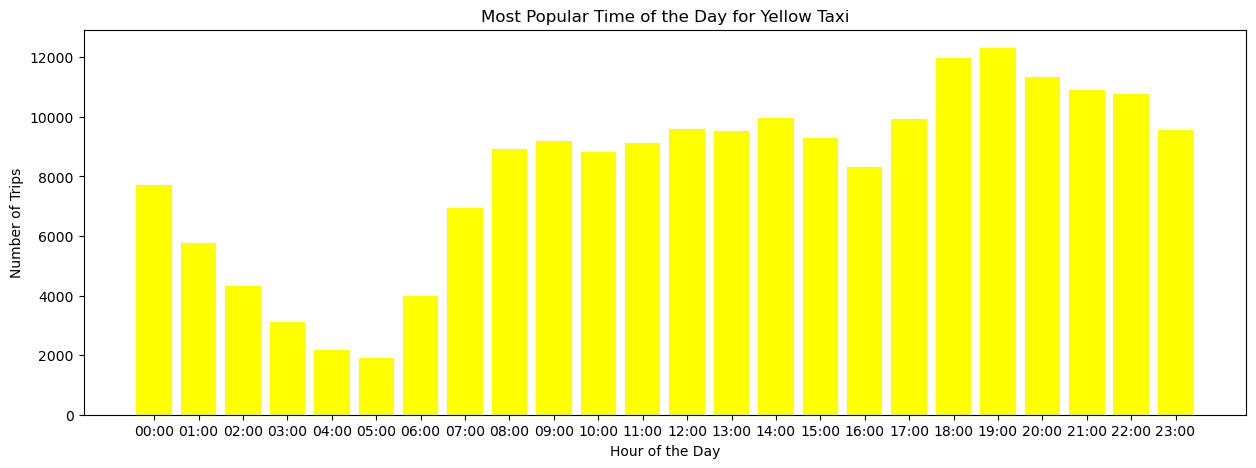

In [37]:
trips_hour()

### Question 2

Create a visualization that shows the average distance traveled per month (regardless of year - so group by each month) for both taxis and Ubers combined. Include the 90% confidence interval around the mean in the visualization.

### Answer 

In [38]:
def distance_month():
    month_distance = engine.execute("""
    select strftime("%m",tpep_pickup_datetime) as Month, avg(trip_distance) as Average_distance
    from (
    select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
    from Yellow_Taxi
    union all
    select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
    from Uber_new
    )
    group by Month
    """).fetchall()
    month_name = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "Novemeber","December"]
    months = [month_name[int(i[0])-1] for i in month_distance]
    trip_distance = [i[1] for i in month_distance]
    all_month_distance = engine.execute("""
    select strftime("%m",tpep_pickup_datetime) as Month, trip_distance
    from (
    select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
    from Yellow_Taxi
    union all
    select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
    from Uber_new
    )
    """).fetchall()
    month_data = pd.DataFrame(data=all_month_distance, columns=["Month", "Distance"])
    month_data = month_data.groupby("Month").agg(["mean","count","std"])
    mean = month_data["Distance"]["mean"]
    std = month_data["Distance"]["std"]
    month_data["lower"] = month_data["Distance"]["mean"] - 1.64*(month_data["Distance"]["std"]/np.sqrt(month_data["Distance"]["count"]))
    month_data["upper"] = month_data["Distance"]["mean"] + 1.64*(month_data["Distance"]["std"]/np.sqrt(month_data["Distance"]["count"]))
    month_data["Diff"]= month_data["upper"] - month_data["lower"]
    plt.figure(figsize=[15,10], dpi=100)
    plt.bar(months, mean, yerr = month_data["Diff"]/2, capsize=10)
    plt.ylim([2.2,2.7])
    plt.xlabel("Month of the Year")
    plt.ylabel("Average Distance Travelled (miles)")
    plt.title("Average Distance for each Month")
    return plt.show()

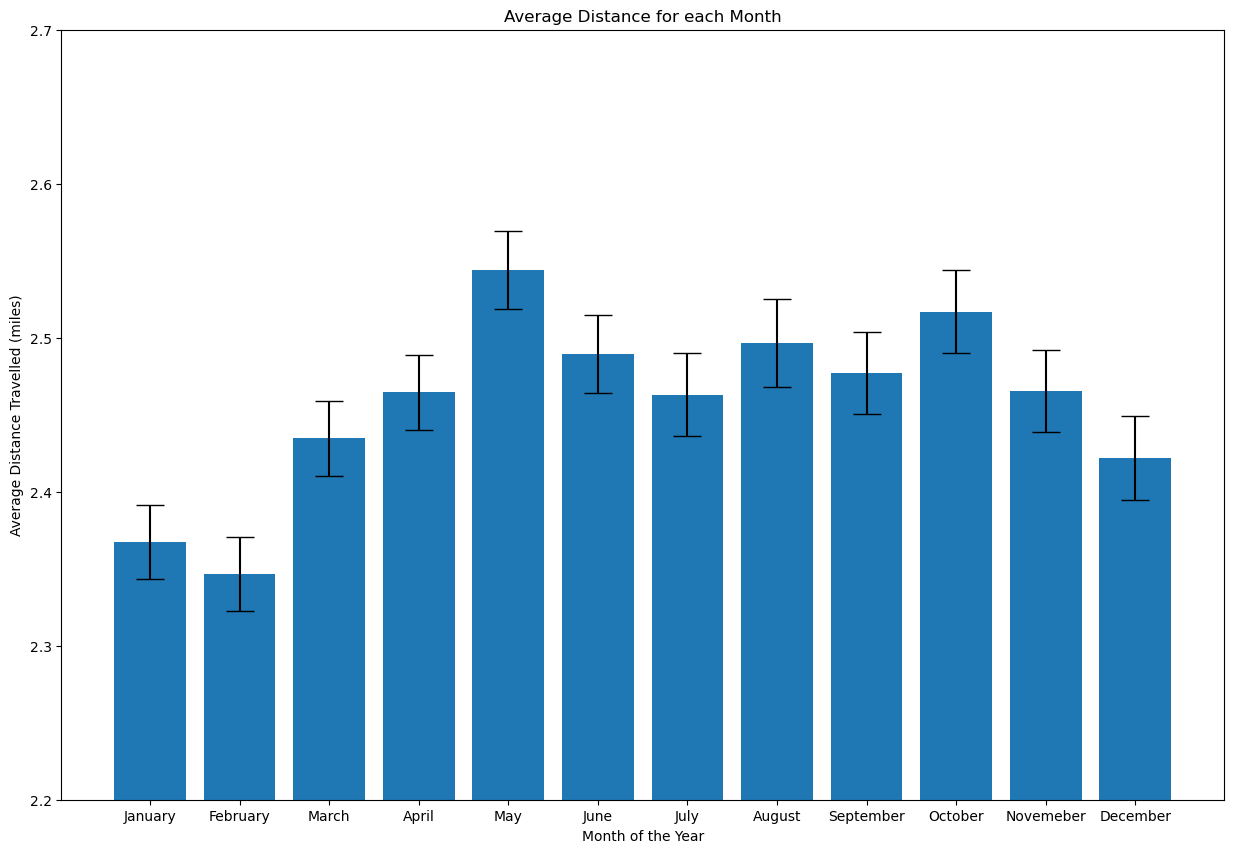

In [39]:
distance_month()

### Question 3

Define three lat/long coordinate boxes around the three major New York airports: LGA, JFK, and EWR (you can use bboxfinder to help). Create a visualization that compares what day of the week was most popular for drop offs for each airport.


### Answer:

In [40]:
def airport_week_traffic():
    lat1_lga = 40.764378
    lat2_lga = 40.788817
    long1_lga = -73.890103
    long2_lga = -73.852680

    long1_ewr, lat1_ewr, long2_ewr, lat2_ewr = -74.224983,40.661716,-74.143272,40.723671
    long1_jfk, lat1_jfk, long2_jfk, lat2_jfk =-73.828542,40.619587,-73.733957,40.675462
    
    day_counts_lga = engine.execute(f"""select strftime("%w",tpep_pickup_datetime) as Day,count(strftime("%w",tpep_pickup_datetime)) as Frequency 
                    from(
                    select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
                    from Yellow_Taxi
                    union all
                    select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
                    from Uber_new
                    )
                    where dropoff_longitude>={long1_lga} and dropoff_longitude<={long2_lga} and dropoff_latitude>={lat1_lga} and dropoff_latitude<={lat2_lga}
                    group by Day
                    """).fetchall()
    day_counts_ewr = engine.execute(f"""select strftime("%w",tpep_pickup_datetime) as Day,count(strftime("%w",tpep_pickup_datetime)) as Frequency 
                        from(
                        select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
                        from Yellow_Taxi
                        union all
                        select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
                        from Uber_new
                        )
                        where dropoff_longitude>={long1_ewr} and dropoff_longitude<={long2_ewr} and dropoff_latitude>={lat1_ewr} and dropoff_latitude<={lat2_ewr}
                        group by Day
                        """).fetchall()
    day_counts_jfk = engine.execute(f"""select strftime("%w",tpep_pickup_datetime) as Day,count(strftime("%w",tpep_pickup_datetime)) as Frequency 
                        from(
                        select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
                        from Yellow_Taxi
                        union all
                        select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance
                        from Uber_new
                        )
                        where dropoff_longitude>={long1_jfk} and dropoff_longitude<={long2_jfk} and dropoff_latitude>={lat1_jfk} and dropoff_latitude<={lat2_jfk}
                        group by Day
                        """).fetchall()
    day_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    days = [day_name[int(i)] for i in list(zip(*day_counts_lga))[0]]
    freq_lga = list(zip(*day_counts_lga))[1]
    freq_ewr = list(zip(*day_counts_ewr))[1]
    freq_jfk = list(zip(*day_counts_jfk))[1]

    plt.figure(figsize=[10,5], dpi=100)
    plt.title("Traffic for Airports Near New York for Each Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Drop-offs")
    w= 0.35
    x = np.arange(len(days))
    plt.bar(x-w/2,freq_lga,w/2, label="LaGuardia")
    plt.bar(x,freq_jfk,w/2, label="JFK")
    plt.bar(x+w/2,freq_ewr,w/2, label="Newark")
    plt.xticks(x, days)
    plt.legend()
    return plt.show()

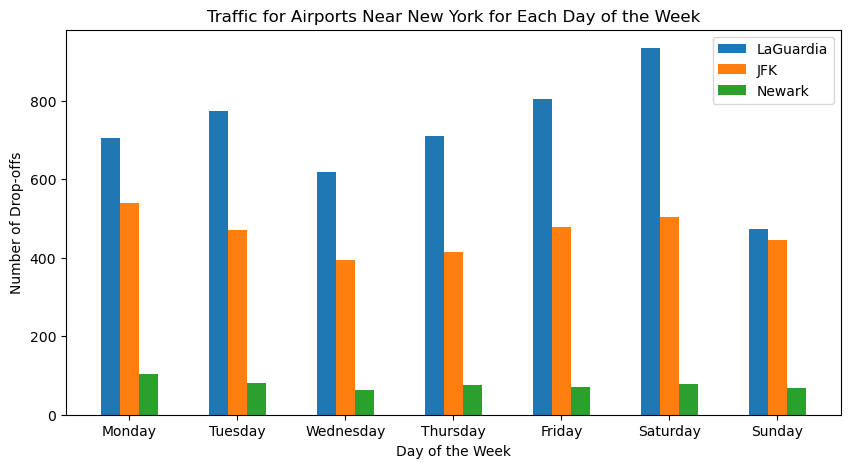

In [41]:
airport_week_traffic()

### Question 4

Create a heatmap of all hired trips over a map of the area. Consider using KeplerGL or another library that helps generate geospatial visualizations.
Note: The screenshot has been posted in github for your review.

### Answer:

In [42]:
def heat_map():
    import pandas as pd
    from keplergl import KeplerGl
    combined_trip_data = engine.execute("""select round(pickup_longitude,3), round(pickup_latitude,3)
                        from (
                        select tpep_pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance, fare_amount
                        from Yellow_Taxi
                        union all
                        select pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance, fare_amount
                        from Uber_new
                        )
                        """).fetchall()
    heat_map_df = pd.DataFrame(data=combined_trip_data, columns=["pickup_longitude","pickup_latitude"])
    heat_grouped = heat_map_df.groupby(["pickup_longitude","pickup_latitude"]).size().reset_index(name='counts')
    map_1 = KeplerGl(height=500)
    map_1.add_data(data = heat_grouped)
    return map_1


In [43]:
heat_map()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'unnamed': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

### Question 5

Create a scatter plot that compares tip amount versus distance for Yellow Taxi rides. You may remove any outliers how you see fit.

### Answer:

In [44]:
def tip_distance():
    tip_distance = engine.execute(f""" select trip_distance, tip_amount
                            from Yellow_Taxi
                            where trip_distance<30 and tip_amount<20
                            """).fetchall()
    distance = list(zip(*tip_distance))[0]
    tip = list(zip(*tip_distance))[1]
    plt.title("Scatter Plot of Tip Amount and Trip Distance")
    plt.scatter(distance, tip)
    plt.ylabel("Tip Amount($)")
    plt.xlabel("Distance (miles)")
    return plt.show()

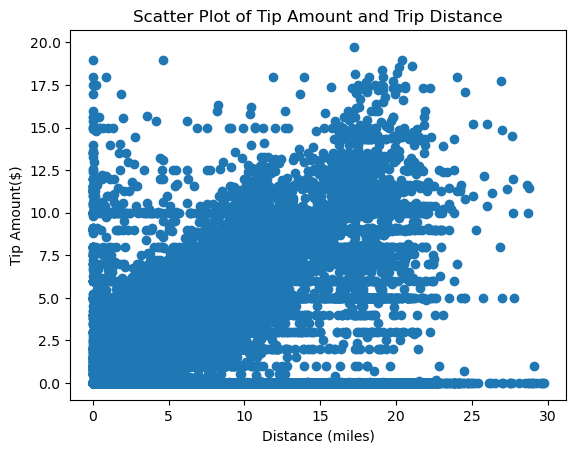

In [45]:
tip_distance()

### Question 6

Create another scatter plot that compares tip amount versus precipitation amount for Yellow Taxi rides. You may remove any outliers how you see fit.

### Answer: 

In [46]:
def tip_precipitation():
    precipitation_data = engine.execute(f""" select strftime("%Y-%m-%d %H",DATE) as Date_hour, HourlyPrecipitation
                            from Weather_hourly
                            where HourlyPrecipitation<0.5
                            """).fetchall()
    Yellow_taxi = engine.execute(f""" select strftime("%Y-%m-%d %H",tpep_pickup_datetime) as Date_hour, tip_amount
                            from Yellow_Taxi
                            """).fetchall()
    prec_df = pd.DataFrame(data=precipitation_data, columns=["Date_hour","HourlyPrecipitation"])
    Yellow_df = pd.DataFrame(data=Yellow_taxi, columns=["Date_hour","tip_amount"])
    df_final = prec_df.merge(Yellow_df.drop_duplicates(subset=["Date_hour"]), how="left", on="Date_hour").dropna()
    #plt.NullLocator()
    plt.figure(figsize=[10,5], dpi=100)
    plt.scatter(df_final["HourlyPrecipitation"],df_final["tip_amount"], color="blue")
    plt.xlabel("Precipitation Level (Inches)")
    plt.xticks(ticks=[0,10,20, 30, 40, 50])
    #plt.gca().xaxis.set_major_locator(ticker.FixedLocator([0,1,5]))
    plt.ylabel("Tip Amount ($)")
    plt.title("Tip Amounts and Precipitation for Yellow Taxi")
    return plt.show()

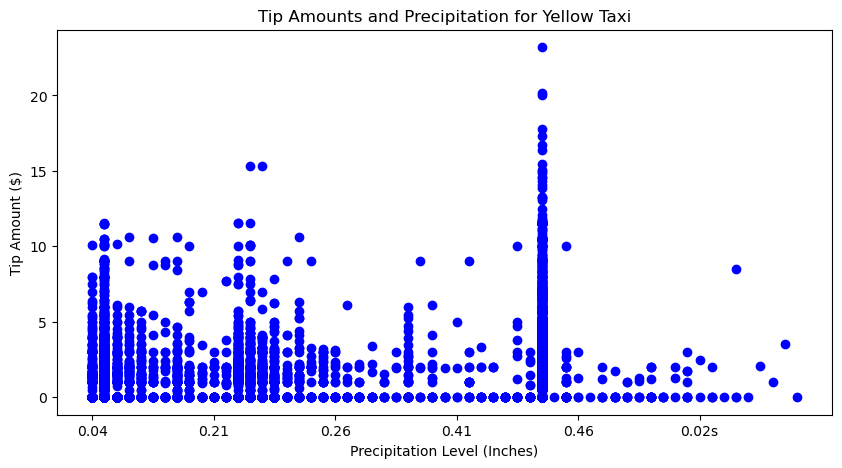

In [47]:
tip_precipitation()

### Question 7a

Compare uber and yellow taxi yearly average fare per mile:

### Answer:

Observations: 

* Uber more expensive that taxis
* Fares for both vehicles have consistently increased
* The price difference between uber and taxi fares seems to increase with time

In [48]:
# Compare yearly average fares (fare/km) for taxi and uber
def yellow_uber_fare():
    yellow_taxi = engine.execute(f""" select strftime("%Y",tpep_pickup_datetime) as Year, sum(fare_amount), sum(trip_distance), sum(fare_amount)/sum(trip_distance) 
                            from Yellow_Taxi
                            group by Year
                            """).fetchall()
    uber_taxi = engine.execute(f""" select strftime("%Y",pickup_datetime) as Year, sum(fare_amount), sum(trip_distance), sum(fare_amount)/sum(trip_distance) 
                        from Uber_new
                        group by Year
                        """).fetchall()
    years = list(zip(*yellow_taxi))[0]
    uber_fare = list(zip(*uber_taxi))[-1]
    yellow_fare = list(zip(*yellow_taxi))[-1]
    import matplotlib.pyplot as plt
    import numpy as np
    plt.figure(figsize=[8,5],dpi=100)
    x = np.arange(len(years))
    w=0.35
    plt.bar(x+w/2,uber_fare,w, color="black" ,label="Uber")
    plt.bar(x-w/2,yellow_fare,w, color="yellow" ,label="Yellow")
    plt.xticks(x, years)
    plt.title("Uber and Yellow Taxi Yearly Fare/mile")
    plt.xlabel("Years")
    plt.ylabel("Trip Fare ($/mile)")
    plt.legend()
    return plt.show()


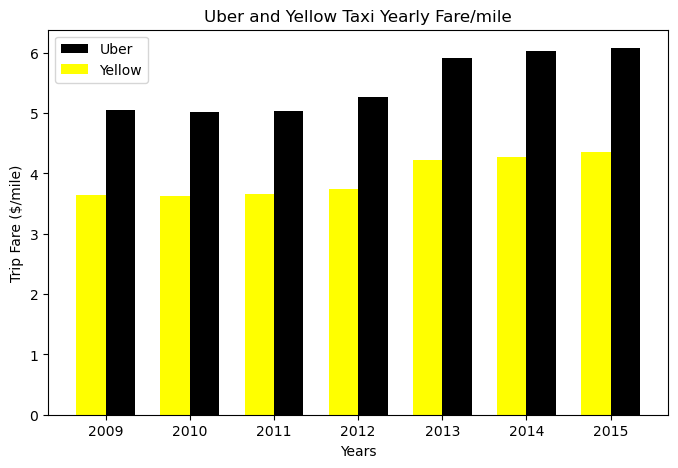

In [49]:
yellow_uber_fare()

### Question 7b

Compare the difference in the popularity between yellow taxi and uber during the day:

### Answer:

Observations: 

* During afternoon and evening hours yellow taxi is clearly more popular than uber
* On the other hand during other hours the popularity alternates  

In [50]:
# Popularity of uber vs taxi throughout the day
def popularity_hour():
    import matplotlib.pyplot as plt
    import numpy as np
    yellow_rush_hour = engine.execute("""select strftime("%H",tpep_pickup_datetime) as Hours, count(strftime("%H",tpep_pickup_datetime)) as Frequency 
                            from Yellow_Taxi
                            group by Hours
                            order by Hours ASC""").fetchall()
    uber_rush_hour = engine.execute("""select strftime("%H",pickup_datetime) as Hours, count(strftime("%H",pickup_datetime)) as Frequency 
                        from Uber_new
                        group by Hours
                        order by Hours ASC""").fetchall()
    w=0.35

    hour = [f"{i[0]}:00" for i in yellow_rush_hour]
    x = np.arange(len(hour))
    trips_y = [i[1] for i in yellow_rush_hour]
    trips_u = [i[1] for i in uber_rush_hour]
    y_data = np.array(trips_y)-np.array(trips_u)
    plt.figure(figsize=[15,8], dpi=100)
    plt.bar(x, y_data, w, color=(pd.Series(data=y_data)>0).map({True:"yellow", False:"black"}))
    plt.xlabel("Hour of the Day")
    plt.ylabel("Difference in Number of Trips")
    plt.xticks(x, hour)
    plt.title("Difference in Yellow Taxi and Uber Trips during the Day")
    return plt.show()

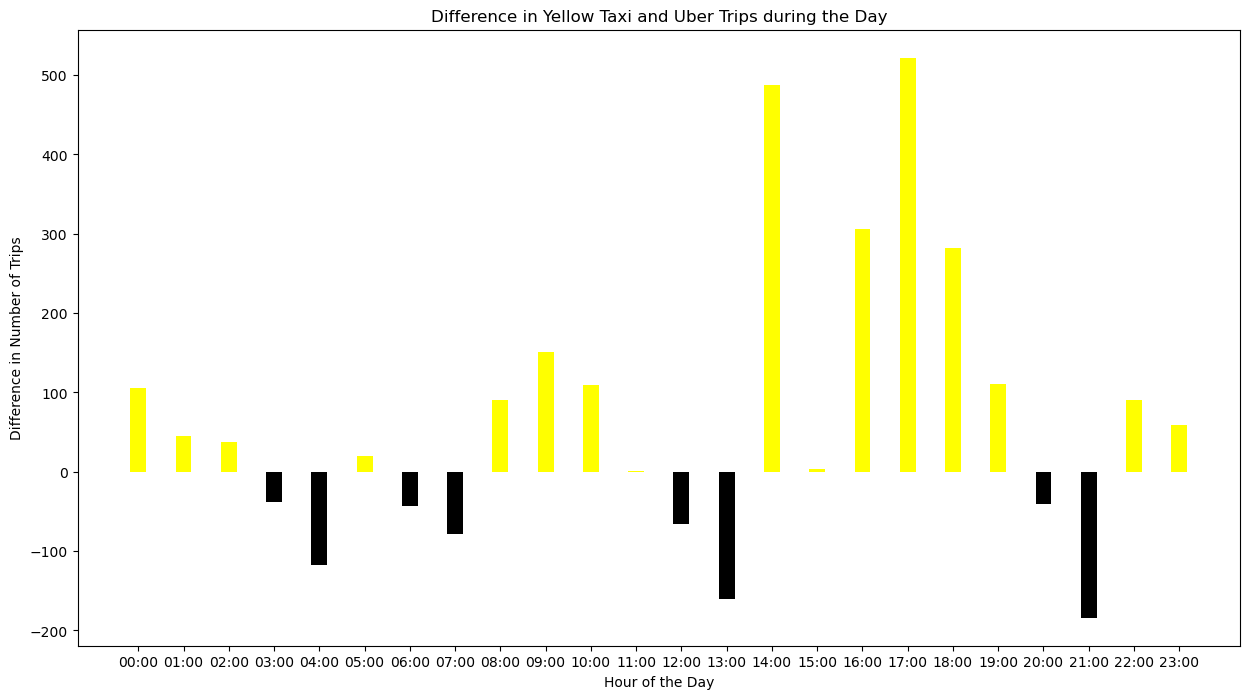

In [51]:
popularity_hour()

### Question 7c

Compare uber and yellow taxi fare prices for different amount of rain. 

### Answer:

Note:
* Rain is classified in light (< 0.01 inches) , moderate ( <0.3) and heavy(>0.3)

Observations: 

* There are not significant difference in the fare prices due to the rain, hence we can conclude that uber and taxi pricing is not a function of weather.
* Although, the small difference in the fares could possible be because of the decrease in demand as rain increases.  
* Uber price increases for high demand and decreases in lower demand

In [52]:
# Get daily average precipitation and classify into moderate, light and heavy
def rain_yellow_uber():
    import pandas as pd
    precipitation_data= engine.execute("""select strftime("%Y-%m-%d",DATE) as Date, avg(HourlyPrecipitation) as Precipitation 
                            from Weather_hourly
                            group by strftime("%Y-%m-%d",DATE)""").fetchall()
    prec_df = pd.DataFrame(data=precipitation_data, columns=["Date","Precipitaion"])
    prec_df["Rain"] = pd.cut(prec_df["Precipitaion"], bins=[0,0.01,0.3,10], labels=["light","moderate","heavy"])
    yellow_taxi = engine.execute(f""" select strftime("%Y-%m-%d",tpep_pickup_datetime) as Day, sum(fare_amount)/sum(trip_distance) 
                                from Yellow_Taxi
                                group by Day
                                """).fetchall()
    uber_taxi = engine.execute(f""" select strftime("%Y-%m-%d",pickup_datetime) as Day, sum(fare_amount)/sum(trip_distance) 
                            from Uber_new
                            group by Day
                            """).fetchall()
    yellow_df = pd.DataFrame(data=yellow_taxi,columns=["Date","Yellow_Fare/mile"])
    uber_df = pd.DataFrame(data=uber_taxi,columns=["Date","Uber_Fare/mile"])
    df_1 = prec_df.merge(yellow_df, how="left", on=["Date"])
    df_2 = df_1.merge(uber_df, how="left", on=["Date"]).dropna()
    df_final = df_2.groupby("Rain").mean()[["Yellow_Fare/mile","Uber_Fare/mile"]]
    hour = df_final.index
    w= 0.25
    x = np.arange(len(hour))
    trips_y = df_final["Yellow_Fare/mile"]
    trips_u = df_final["Uber_Fare/mile"]
    plt.figure(figsize=[10,7], dpi=100)
    plt.bar(x+w/2, trips_y, w, color="yellow" ,label="Yellow Taxi")
    plt.bar(x-w/2, trips_u, w, color="black",label="Uber")
    plt.xlabel("Rain Category")
    plt.ylabel("Fare per mile")
    plt.plot(x+w/2,df_final["Yellow_Fare/mile"],"*-", color="black")
    plt.plot(x-w/2,df_final["Uber_Fare/mile"],"*-",color="yellow")
    plt.xticks(x, hour)
    plt.ylim([3,6])
    plt.title("Fare per mile for varying rain intensity")
    plt.legend()
    return plt.show()


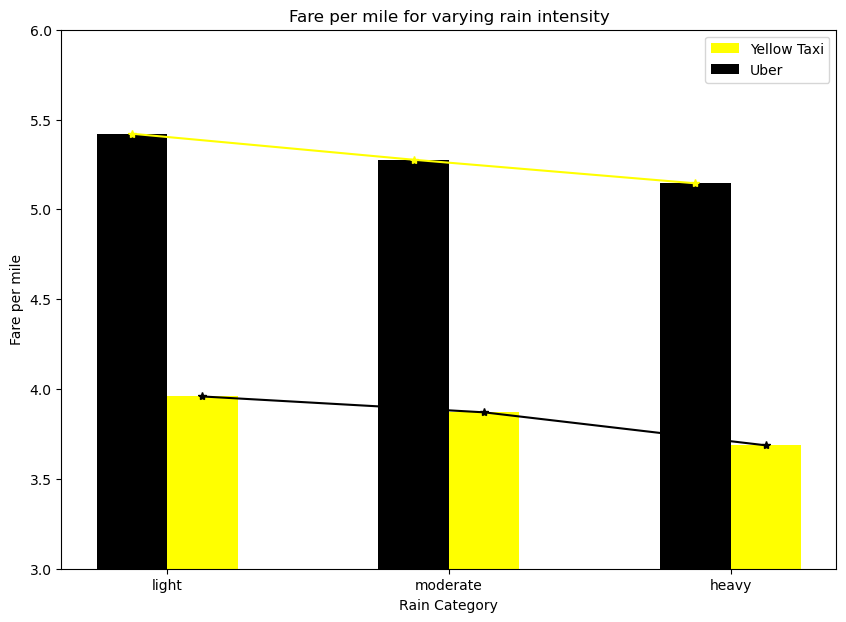

In [53]:
rain_yellow_uber()